In [1]:
# import standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sys
import torch

In [2]:
# import embedding visualisation modules
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
# import dataset
sys.path.insert(0, '//wsl$/Ubuntu/home/zaidek/Part-II-Disertation/Neural Networks')
from ipynb.fs.defs.datasets import BertProcessedTitleEmbeddingDataset

In [4]:
# define PCA
def apply_pca(n_components, data):
    pca = PCA(n_components=n_components)

    reduced_embed = pca.fit_transform(data)

    first_dim = reduced_embed[:,0]
    second_dim = reduced_embed[:,1]
    third_dim = reduced_embed[:,2]

    return (first_dim, second_dim, third_dim)

In [5]:
# import data 
with open("../data/data_train", "rb") as fb:
    training_data = pickle.load(fb)

with open("../data/data_valid", "rb") as fb:
    validation_data = pickle.load(fb)

with open("../data/data_test", "rb") as fb:
    testing_data = pickle.load(fb)

In [6]:
training_data = training_data.loc[training_data.type == "story"]
validation_data = validation_data.loc[validation_data.type == "story"]
testing_data = testing_data.loc[testing_data.type == "story"]

train_data_indexed = training_data.reset_index(drop=True)
valid_data_indexed = validation_data.reset_index(drop=True)
test_data_indexed = testing_data.reset_index(drop=True)

train_data_indexed.title = train_data_indexed.title.fillna("")
valid_data_indexed.title = valid_data_indexed.title.fillna("")
test_data_indexed.title = test_data_indexed.title.fillna("")


dataset_train = BertProcessedTitleEmbeddingDataset(train_data_indexed, train_data_indexed.score, 20)
dataset_valid = BertProcessedTitleEmbeddingDataset(valid_data_indexed, valid_data_indexed.score, 20)
dataset_test = BertProcessedTitleEmbeddingDataset(test_data_indexed, test_data_indexed.score, 20)

In [7]:
training_data

,title,url,text,dead,by,score,time,type,id,parent,descendants,ranking,deleted,timestamp
2093443,Seagate is targeting 2018 for 16TB 3.5-inch HA...,http://www.theregister.co.uk/2016/11/16/16tb_h...,NaN,NaN,CapitalistCartr,2.0,1.479395e+09,story,12978045,NaN,0.0,NaN,NaN,2016-11-17T15:11:13Z
3247161,Why a small team chose Mercurial.,http://www.ninthdivision.com/blog/2011/01/why-...,After using git and then using Mercurial it wa...,NaN,atrain34,37.0,1.295045e+09,story,2105725,NaN,30.0,NaN,NaN,2011-01-14T22:44:56Z
3095997,Show HN: MUI – Lightweight Material Design CSS...,https://www.muicss.com,NaN,NaN,andres,56.0,1.424355e+09,story,9073984,NaN,19.0,NaN,NaN,2015-02-19T14:03:21Z
3384316,Google Needs to Know What Oracle Really Wants ...,http://seekingalpha.com/article/220436-google-...,NaN,NaN,stretchwithme,2.0,1.281802e+09,story,1603460,NaN,2.0,NaN,NaN,2010-08-14T16:02:26Z
1273735,Stephen Hawking Talks About the Linux-Based In...,http://news.softpedia.com/news/Stephen-Hawking...,NaN,NaN,lclark,2.0,1.410451e+09,story,8303283,NaN,0.0,NaN,NaN,2014-09-11T15:51:53Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202036,Snapchat Stories Getting 25M Viewers? No Way,http://wojdylosocialmedia.com/snapchat-stories...,NaN,NaN,dearemily,1.0,1.425174e+09,story,9125716,NaN,0.0,NaN,NaN,2015-03-01T01:44:43Z
3572836,Companies Don’t Discriminate Front-End Developers,https://medium.com/@sadiqevani/companies-don-t...,NaN,NaN,riqbal,2.0,1.457099e+09,story,11223576,NaN,2.0,NaN,NaN,2016-03-04T13:35:47Z
2488595,Streaming desktop audio on Linux without Pulse...,http://www.pogo.org.uk/~mark/trx/streaming-des...,NaN,NaN,zbuf,3.0,1.450626e+09,story,10767281,NaN,2.0,NaN,NaN,2015-12-20T15:35:32Z
2632779,Wake Up Easier with Clockwise Smart Alarm,https://play.google.com/store/apps/details?id=...,NaN,True,clockwiseapp,1.0,1.485894e+09,story,13534865,NaN,NaN,NaN,NaN,2017-01-31T20:26:21Z


In [21]:
embedding_train = []
embedding_valid = []
embedding_test = []

In [22]:
#for data in dataset_train:
#    embedding_train.append(data[0])

KeyError: 490318

In [24]:
#for data in dataset_valid:
#    embedding_valid.append(data[0])

KeyError: 65376

In [26]:
#for data in dataset_test:
#    embedding_test.append(data[0])

KeyError: 98063

In [23]:
with open("data/embeddings/bert_train_embeddings", "wb") as fb:
    pickle.dump(embedding_train, fb)

In [25]:
with open("data/embeddings/bert_valid_embeddings", "wb") as fb:
    pickle.dump(embedding_valid, fb)

In [27]:

with open("data/embeddings/bert_test_embeddings", "wb") as fb:
    pickle.dump(embedding_test, fb)

In [58]:
embedding_train_2 = [embed.detach().numpy() for embed in embedding_train]

In [60]:
output = apply_pca(3, embedding_train_2)

In [75]:
import seaborn as sns

In [79]:
output

(array([-0.86076464,  1.05185694,  0.4292429 , ..., -1.58954428,
         0.33002289, -2.14085674]),
 array([ 0.60627145,  1.21185577,  2.90244598, ..., -3.72645081,
         2.99477673, -3.06728604]),
 array([ 3.37397829,  1.40647585,  3.0308046 , ..., -1.95550204,
         2.56212095, -1.06905991]))

In [83]:
cutoff = 20
scores = [0 if score < cutoff else 1 for score in train_data_indexed.score.fillna(0)]

In [106]:
pca_df = pd.DataFrame()
pca_df["X"] = output[0][:500]
pca_df["Y"] = output[1][:500]
pca_df["Z"] = output[2][:500]
pca_df["popular"] = scores[:500]

pca_df

,X,Y,Z,popular
0,-0.860765,0.606271,3.373978,0
1,1.051857,1.211856,1.406476,1
2,0.429243,2.902446,3.030805,1
3,-2.512139,-2.656479,-0.901966,0
4,-2.616232,-2.853678,0.618908,0
...,...,...,...,...
495,-0.915638,0.031918,-1.198104,0
496,-0.053591,3.078709,-1.876620,0
497,-1.804021,-2.832565,-0.156986,0
498,1.221049,5.204483,-3.937803,0


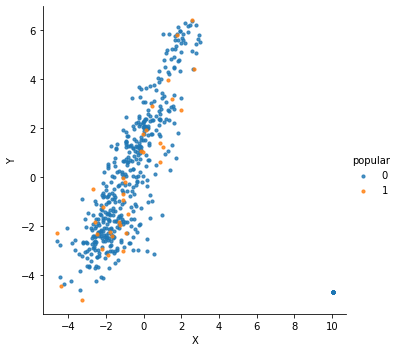

In [107]:
sns.lmplot(
    x='X', 
    y='Y', 
    data=pca_df, 
    hue='popular', 
    fit_reg=False, 
    legend=True,
    scatter_kws={"s": 10}
)

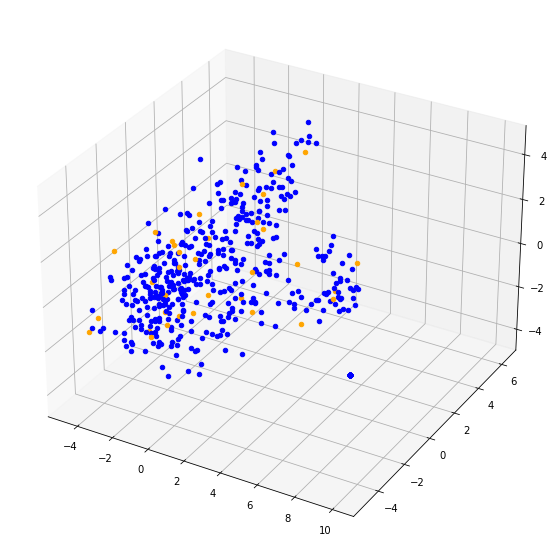

In [108]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='3d')
col = ["blue", "orange"]
for i in range(len(pca_df)):
    row = pca_df.loc[i]
    ax.scatter(row["X"], row["Y"], row["Z"], c = col[int(row["popular"])])
plt.show()